### Example:

In [8]:
from BiasedErasure.delayed_erasure_decoders.Experimental_Loss_Decoder import *
import numpy as np

distance = 3
decoder_basis = 'Z'
gate_ordering = ['Z', 'Zr', 'Zr', 'Z', 'Z', 'Zr']
num_cycles = len(gate_ordering)
noise_params = {'idle_loss_rate': 2.793300220405646e-07, 'idle_error_rate': np.array([6.60547942e-09, 3.38336163e-08, 2.67533789e-07]),
                'entangling_zone_error_rate': np.array([3.66476387e-04, 6.14732819e-06, 2.35857048e-03]),
                'entangling_gate_error_rate': [2.2260729018707513e-05, 0.00017139584089578063, 0.0012948317242757047, 2.2260729018707513e-05, 0, 0, 0, 0.00017139584089578063, 0, 0, 0, 0.0012948317242757047, 0, 0, 0.002621736717313752],
                'entangling_gate_loss_rate': 0.00039272255674060926, 'single_qubit_error_rate': np.array([1.53681034e-05, 9.93583065e-04, 1.94650113e-05]),
                'reset_error_rate': 5.89409983290463e-05, 'measurement_error_rate': 0.0006138700821647161, 'reset_loss_rate': 0.0007531131027610011, 'measurement_loss_rate': 0.07131074481520218, 'ancilla_idle_loss_rate': 1.6989311035347498e-07,
                'ancilla_idle_error_rate': np.array([1.46727589e-07, 4.60893305e-08, 2.30298714e-06]), 'ancilla_reset_error_rate': 0.024549181355318986, 'ancilla_measurement_error_rate': 0.0012815874700447462, 'ancilla_reset_loss_rate': 0.00019528486460263086, 'ancilla_measurement_loss_rate': 0.00047357577582906143,
                'gate_noise': LogicalCircuit.ancilla_data_differentiated_gate_noise, 'idle_noise': LogicalCircuit.ancilla_data_differentiated_idle_noise}



Meta_params = {
    'architecture': 'CBQC', 'code': 'Rotated_Surface', 'logical_basis': decoder_basis,
    'bias_preserving_gates': 'False', 'noise': 'atom_array', 'is_erasure_biased': 'False',
    'LD_freq': '2', 'LD_method': 'SWAP', 'SSR': 'True', 'cycles': str(num_cycles),
    'ordering': gate_ordering, 'decoder': 'MLE', 'circuit_type': 'memory',
    'Steane_type': 'regular', 'printing': 'True', 'num_logicals': '1',
    'loss_decoder': 'independent', 'obs_pos': 'd-1', 'n_r': '0', 'circuit_index': '0'
}
noise_params = {'idle_loss_rate': 2.1462892652881424e-07, 'idle_error_rate': np.array([5.31106535e-09, 2.59649716e-08, 2.70017446e-07]), 'entangling_zone_error_rate': np.array([3.22871520e-04, 5.55115000e-06, 1.28240286e-03]), 'entangling_gate_error_rate': [1.8729598643991336e-05, 0.00016597465639499589, 0.0013401575256883555, 1.8729598643991336e-05, 0, 0, 0, 0.00016597465639499589, 0, 0, 0, 0.0013401575256883555, 0, 0, 0.0026654438378731237], 'entangling_gate_loss_rate': 0.0012268907363777474, 'single_qubit_error_rate': np.array([9.01549152e-06, 8.45064836e-04, 1.91825416e-05]), 'reset_error_rate': 0.00013112864576086654, 'measurement_error_rate': 0.003220085408683493, 'reset_loss_rate': 0.0007849977760100565, 'measurement_loss_rate': 0.06657247422436202, 'ancilla_idle_loss_rate': 1.7048289168299613e-07, 'ancilla_idle_error_rate': np.array([1.30011070e-07, 3.79578658e-08, 3.73757626e-06]), 'ancilla_reset_error_rate': 0.02267054400731952, 'ancilla_measurement_error_rate': 0.011477399332064406, 'ancilla_reset_loss_rate': 0.00014151808789913066, 'ancilla_measurement_loss_rate': 0.0004062050339110557,
                'gate_noise':LogicalCircuit.ancilla_data_differentiated_gate_noise,
            'idle_noise':LogicalCircuit.ancilla_data_differentiated_idle_noise}


num_shots = 50
detection_events_signs = None
measurement_events, _, _, circuit = get_simulated_measurement_events(Meta_params, distance, distance, num_shots, noise_params)


# Now let's decode!
use_loss_decoding = True  # if False: use same DEM every shot, without utilizing SSR.
use_independent_decoder = True  # if False: in every lifecycle, we just apply supercheck at the end. If True: we count the full lifecycle with different potential loss locations and corresponding Clifford propagations.
use_independent_and_first_comb_decoder = False  # This is relevant only if use_independent_decoder=True. If False: use only independent lifecycles. If True: adds a single combination of lifecycles to the decoder.
output_dir = '/Users/gefenbaranes/Documents/memory_experiment'
logical_gap = False
# circuit = get_lossless_circuit(Meta_params, distance, distance, noise_params)

# DO IT
if not logical_gap:
    predictions, observable_flips, dems_list = Loss_MLE_Decoder_Experiment(Meta_params, distance, distance, output_dir,
                                                                        measurement_events,
                                                                        detection_events_signs, use_loss_decoding,
                                                                        use_independent_decoder,
                                                                        use_independent_and_first_comb_decoder,
                                                                        logical_gaps=False,
                                                                        noise_params=noise_params, num_shots=num_shots)
    logical_probability = np.mean(np.logical_xor(observable_flips, predictions))
    
else:
    predictions, log_probabilities, observable_flips, dems_list = Loss_MLE_Decoder_Experiment(Meta_params, distance, distance, output_dir,
                                                                        measurement_events,
                                                                        detection_events_signs, use_loss_decoding,
                                                                        use_independent_decoder,
                                                                        use_independent_and_first_comb_decoder,
                                                                        logical_gaps=True, 
                                                                        noise_params=noise_params, num_shots=num_shots)

    logical_probability = np.mean(np.logical_xor(observable_flips.flatten(), predictions[:, 0]))


print('logical error',logical_probability)

# error bar: (np.sqrt(P*(1-P)/num_shots))

Logical circuit that will be used: 
R 1 2 3 7 8 9 13 14 15
X_ERROR(0.000131129) 1 2 3 7 8 9 13 14 15
I 1 2 3 7 8 9 13 14 15
SQRT_Y_DAG 2 7 9 14
PAULI_CHANNEL_1(9.01549e-06, 0.000845065, 1.91825e-05) 2 7 9 14
TICK
R 4 6 10 12 0 5 11 16
X_ERROR(0.0226705) 0 4 5 6 10 11 12 16
I 0 4 5 6 10 11 12 16
SQRT_Y 4 6 10 12 0 5 11 16
PAULI_CHANNEL_1(9.01549e-06, 0.000845065, 1.91825e-05) 4 6 10 12 0 5 11 16
CZ 1 0 8 5 13 11 4 7 6 9 12 14
PAULI_CHANNEL_2(1.87296e-05, 0.000165975, 0.00134016, 1.87296e-05, 0, 0, 0, 0.000165975, 0, 0, 0, 0.00134016, 0, 0, 0.00266544) 1 0 8 5 13 11 4 7 6 9 12 14
PAULI_CHANNEL_1(0.000322872, 5.55115e-06, 0.0012824) 2 3 10 15 16
I 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
SQRT_Y 1 2 3 7 8 9 13 14 15
PAULI_CHANNEL_1(9.01549e-06, 0.000845065, 1.91825e-05) 1 2 3 7 8 9 13 14 15
Y 0
PAULI_CHANNEL_1(9.01549e-06, 0.000845065, 1.91825e-05) 0
CZ 2 0 9 5 14 11 4 8 10 13 12 15
PAULI_CHANNEL_2(1.87296e-05, 0.000165975, 0.00134016, 1.87296e-05, 0, 0, 0, 0.000165975, 0, 0, 0, 0.00134016

In [4]:
a = ['Z', 'Zr']
b = a * 1
print(b)

['Z', 'Zr']


### Plot LER vs num rounds for period = 1 (Z,Zr,Z,Zr,Z,Zr,...)

In [6]:
from BiasedErasure.delayed_erasure_decoders.Experimental_Loss_Decoder import *
import numpy as np

distance = 3
decoder_basis = 'Z'
noise_params = {'idle_loss_rate': 2.1462892652881424e-07, 'idle_error_rate': np.array([5.31106535e-09, 2.59649716e-08, 2.70017446e-07]), 'entangling_zone_error_rate': np.array([3.22871520e-04, 5.55115000e-06, 1.28240286e-03]), 'entangling_gate_error_rate': [1.8729598643991336e-05, 0.00016597465639499589, 0.0013401575256883555, 1.8729598643991336e-05, 0, 0, 0, 0.00016597465639499589, 0, 0, 0, 0.0013401575256883555, 0, 0, 0.0026654438378731237], 'entangling_gate_loss_rate': 0.0012268907363777474, 'single_qubit_error_rate': np.array([9.01549152e-06, 8.45064836e-04, 1.91825416e-05]), 'reset_error_rate': 0.00013112864576086654, 'measurement_error_rate': 0.003220085408683493, 'reset_loss_rate': 0.0007849977760100565, 'measurement_loss_rate': 0.06657247422436202, 'ancilla_idle_loss_rate': 1.7048289168299613e-07, 'ancilla_idle_error_rate': np.array([1.30011070e-07, 3.79578658e-08, 3.73757626e-06]), 'ancilla_reset_error_rate': 0.02267054400731952, 'ancilla_measurement_error_rate': 0.011477399332064406, 'ancilla_reset_loss_rate': 0.00014151808789913066, 'ancilla_measurement_loss_rate': 0.0004062050339110557,
                'gate_noise':LogicalCircuit.ancilla_data_differentiated_gate_noise,
            'idle_noise':LogicalCircuit.ancilla_data_differentiated_idle_noise}


logical_error_rates = []
logical_error_rates_err = []

num_cycles_vec = [2,4,6,8]
for num_cycles in num_cycles_vec:
    
    gate_ordering = ['Z', 'Zr'] * int(num_cycles / 2)
    print(f"num_cycles = {num_cycles}, gate_ordering = {gate_ordering}")
    num_cycles = len(gate_ordering)


    Meta_params = {
        'architecture': 'CBQC', 'code': 'Rotated_Surface', 'logical_basis': decoder_basis,
        'bias_preserving_gates': 'False', 'noise': 'atom_array', 'is_erasure_biased': 'False',
        'LD_freq': '1', 'LD_method': 'SWAP', 'SSR': 'True', 'cycles': str(num_cycles),
        'ordering': gate_ordering, 'decoder': 'MLE', 'circuit_type': 'memory',
        'Steane_type': 'regular', 'printing': 'False', 'num_logicals': '1',
        'loss_decoder': 'independent', 'obs_pos': 'd-1', 'n_r': '0', 'circuit_index': '0'
    }

    num_shots = 1000
    detection_events_signs = None
    measurement_events, _, _, circuit = get_simulated_measurement_events(Meta_params, distance, distance, num_shots, noise_params)


    # Now let's decode!
    use_loss_decoding = True  # if False: use same DEM every shot, without utilizing SSR.
    use_independent_decoder = True  # if False: in every lifecycle, we just apply supercheck at the end. If True: we count the full lifecycle with different potential loss locations and corresponding Clifford propagations.
    use_independent_and_first_comb_decoder = False  # This is relevant only if use_independent_decoder=True. If False: use only independent lifecycles. If True: adds a single combination of lifecycles to the decoder.
    output_dir = '/Users/gefenbaranes/Documents/memory_experiment'
    logical_gap = False
    # circuit = get_lossless_circuit(Meta_params, distance, distance, noise_params)

    # DO IT
    if not logical_gap:
        predictions, observable_flips, dems_list = Loss_MLE_Decoder_Experiment(Meta_params, distance, distance, output_dir,
                                                                            measurement_events,
                                                                            detection_events_signs, use_loss_decoding,
                                                                            use_independent_decoder,
                                                                            use_independent_and_first_comb_decoder,
                                                                            logical_gaps=False,
                                                                            noise_params=noise_params, num_shots=num_shots)
        logical_probability = np.mean(np.logical_xor(observable_flips, predictions))
        
    else:
        predictions, log_probabilities, observable_flips, dems_list = Loss_MLE_Decoder_Experiment(Meta_params, distance, distance, output_dir,
                                                                            measurement_events,
                                                                            detection_events_signs, use_loss_decoding,
                                                                            use_independent_decoder,
                                                                            use_independent_and_first_comb_decoder,
                                                                            logical_gaps=True, 
                                                                            noise_params=noise_params, num_shots=num_shots)

        logical_probability = np.mean(np.logical_xor(observable_flips.flatten(), predictions[:, 0]))

    err_bar =  (np.sqrt(logical_probability*(1-logical_probability)/num_shots))
    
    
    logical_error_rates.append(logical_probability)
    logical_error_rates_err.append(err_bar)
    print(f'logical error = {logical_probability} +- {err_bar}')



num_cycles = 2, gate_ordering = ['Z', 'Zr']
final measurement_index = 25
final measurement_index = 25
Preprocessing is done! it took 3.42s
0 100 200 300 400 500 600 700 800 900 logical error = 0.047 +- 0.006692607862410586
num_cycles = 4, gate_ordering = ['Z', 'Zr', 'Z', 'Zr']
final measurement_index = 41
final measurement_index = 41
Preprocessing is done! it took 11.28s
0 100 200 300 400 500 600 700 800 900 logical error = 0.071 +- 0.008121514637061242
num_cycles = 6, gate_ordering = ['Z', 'Zr', 'Z', 'Zr', 'Z', 'Zr']
final measurement_index = 57
final measurement_index = 57
Preprocessing is done! it took 24.19s
0 100 200 300 400 500 600 700 800 900 logical error = 0.103 +- 0.009612023720320296
num_cycles = 8, gate_ordering = ['Z', 'Zr', 'Z', 'Zr', 'Z', 'Zr', 'Z', 'Zr']
final measurement_index = 73
final measurement_index = 73
Preprocessing is done! it took 41.32s
0 100 200 300 400 500 600 700 800 900 logical error = 0.124 +- 0.010422283818818216


<ErrorbarContainer object of 3 artists>

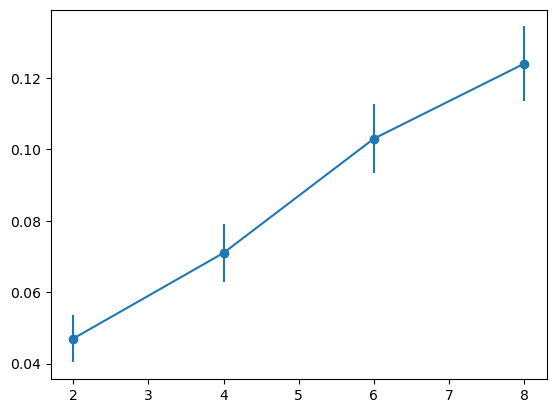

In [9]:
import matplotlib.pyplot as plt
num_cycles_vec = [2,4,6,8]
plt.errorbar(x=num_cycles_vec, y=logical_error_rates, yerr=logical_error_rates_err, fmt='-o')

### Plot LER vs num rounds for period = 2 (Z,_,Zr,_,Z,_,Zr,_,Z,_,Zr,_,..) = (Z,Z,Zr,Zr,Z,Z,Zr,Zr,Z,Z,Zr,Zr,..)

In [10]:
from BiasedErasure.delayed_erasure_decoders.Experimental_Loss_Decoder import *
import numpy as np

distance = 3
decoder_basis = 'Z'
noise_params = {'idle_loss_rate': 2.1462892652881424e-07, 'idle_error_rate': np.array([5.31106535e-09, 2.59649716e-08, 2.70017446e-07]), 'entangling_zone_error_rate': np.array([3.22871520e-04, 5.55115000e-06, 1.28240286e-03]), 'entangling_gate_error_rate': [1.8729598643991336e-05, 0.00016597465639499589, 0.0013401575256883555, 1.8729598643991336e-05, 0, 0, 0, 0.00016597465639499589, 0, 0, 0, 0.0013401575256883555, 0, 0, 0.0026654438378731237], 'entangling_gate_loss_rate': 0.0012268907363777474, 'single_qubit_error_rate': np.array([9.01549152e-06, 8.45064836e-04, 1.91825416e-05]), 'reset_error_rate': 0.00013112864576086654, 'measurement_error_rate': 0.003220085408683493, 'reset_loss_rate': 0.0007849977760100565, 'measurement_loss_rate': 0.06657247422436202, 'ancilla_idle_loss_rate': 1.7048289168299613e-07, 'ancilla_idle_error_rate': np.array([1.30011070e-07, 3.79578658e-08, 3.73757626e-06]), 'ancilla_reset_error_rate': 0.02267054400731952, 'ancilla_measurement_error_rate': 0.011477399332064406, 'ancilla_reset_loss_rate': 0.00014151808789913066, 'ancilla_measurement_loss_rate': 0.0004062050339110557,
                'gate_noise':LogicalCircuit.ancilla_data_differentiated_gate_noise,
            'idle_noise':LogicalCircuit.ancilla_data_differentiated_idle_noise}


P2_logical_error_rates = []
P2_logical_error_rates_err = []
P2_num_cycles_vec = [4,8,12]

for num_cycles in P2_num_cycles_vec:
    
    gate_ordering = ['Z', 'Z', 'Zr', 'Zr'] * int(num_cycles / 4)
    print(f"num_cycles = {num_cycles}, gate_ordering = {gate_ordering}")
    num_cycles = len(gate_ordering)


    Meta_params = {
        'architecture': 'CBQC', 'code': 'Rotated_Surface', 'logical_basis': decoder_basis,
        'bias_preserving_gates': 'False', 'noise': 'atom_array', 'is_erasure_biased': 'False',
        'LD_freq': '2', 'LD_method': 'SWAP', 'SSR': 'True', 'cycles': str(num_cycles),
        'ordering': gate_ordering, 'decoder': 'MLE', 'circuit_type': 'memory',
        'Steane_type': 'regular', 'printing': 'False', 'num_logicals': '1',
        'loss_decoder': 'independent', 'obs_pos': 'd-1', 'n_r': '0', 'circuit_index': '0'
    }

    num_shots = 1000
    detection_events_signs = None
    measurement_events, _, _, circuit = get_simulated_measurement_events(Meta_params, distance, distance, num_shots, noise_params)


    # Now let's decode!
    use_loss_decoding = True  # if False: use same DEM every shot, without utilizing SSR.
    use_independent_decoder = True  # if False: in every lifecycle, we just apply supercheck at the end. If True: we count the full lifecycle with different potential loss locations and corresponding Clifford propagations.
    use_independent_and_first_comb_decoder = False  # This is relevant only if use_independent_decoder=True. If False: use only independent lifecycles. If True: adds a single combination of lifecycles to the decoder.
    output_dir = '/Users/gefenbaranes/Documents/memory_experiment'
    logical_gap = False
    # circuit = get_lossless_circuit(Meta_params, distance, distance, noise_params)

    # DO IT
    if not logical_gap:
        predictions, observable_flips, dems_list = Loss_MLE_Decoder_Experiment(Meta_params, distance, distance, output_dir,
                                                                            measurement_events,
                                                                            detection_events_signs, use_loss_decoding,
                                                                            use_independent_decoder,
                                                                            use_independent_and_first_comb_decoder,
                                                                            logical_gaps=False,
                                                                            noise_params=noise_params, num_shots=num_shots)
        logical_probability = np.mean(np.logical_xor(observable_flips, predictions))
        
    else:
        predictions, log_probabilities, observable_flips, dems_list = Loss_MLE_Decoder_Experiment(Meta_params, distance, distance, output_dir,
                                                                            measurement_events,
                                                                            detection_events_signs, use_loss_decoding,
                                                                            use_independent_decoder,
                                                                            use_independent_and_first_comb_decoder,
                                                                            logical_gaps=True, 
                                                                            noise_params=noise_params, num_shots=num_shots)

        logical_probability = np.mean(np.logical_xor(observable_flips.flatten(), predictions[:, 0]))

    err_bar =  (np.sqrt(logical_probability*(1-logical_probability)/num_shots))
    
    
    P2_logical_error_rates.append(logical_probability)
    P2_logical_error_rates_err.append(err_bar)
    print(f'logical error = {logical_probability} +- {err_bar}')



num_cycles = 4, gate_ordering = ['Z', 'Z', 'Zr', 'Zr']
final measurement_index = 41
final measurement_index = 41
Preprocessing is done! it took 11.57s
0 100 200 300 400 500 600 700 800 900 logical error = 0.065 +- 0.007795832219846705
num_cycles = 8, gate_ordering = ['Z', 'Z', 'Zr', 'Zr', 'Z', 'Z', 'Zr', 'Zr']
final measurement_index = 73
final measurement_index = 73
Preprocessing is done! it took 40.44s
0 100 200 300 400 500 600 700 800 900 logical error = 0.087 +- 0.00891240708226459
num_cycles = 12, gate_ordering = ['Z', 'Z', 'Zr', 'Zr', 'Z', 'Z', 'Zr', 'Zr', 'Z', 'Z', 'Zr', 'Zr']
final measurement_index = 105
final measurement_index = 105
Preprocessing is done! it took 88.20s
0 100 200 300 400 500 600 700 800 900 logical error = 0.141 +- 0.011005407761641547


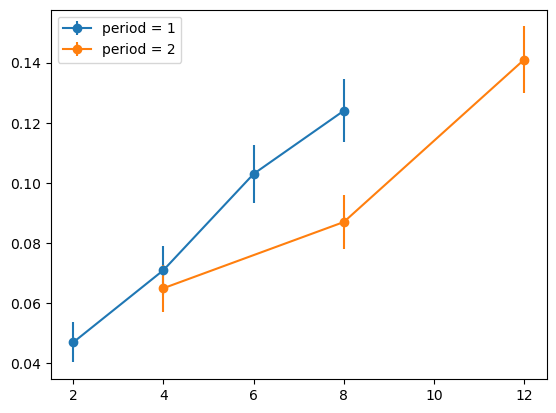

In [12]:

plt.errorbar(x=num_cycles_vec, y=logical_error_rates, yerr=logical_error_rates_err, fmt='-o', label = 'period = 1')
plt.errorbar(x=P2_num_cycles_vec, y=P2_logical_error_rates, yerr=P2_logical_error_rates_err, fmt='-o', label = 'period = 2')
plt.legend()

### Simulate all options together:

In [1]:
from BiasedErasure.delayed_erasure_decoders.Experimental_Loss_Decoder import *
import numpy as np

decoder_basis = 'Z'

# updated noise channels (October 28, 2024):
if decoder_basis == 'X':
    noise_params = {'idle_loss_rate': 2.0450949774399067e-07, 'idle_error_rate': np.array([7.06326614e-09, 3.93582261e-08, 3.07716032e-07]), 'entangling_zone_error_rate': np.array([4.48138464e-04, 4.52669093e-06, 3.63626108e-03]), 'entangling_gate_error_rate': [2.172286257921888e-05, 0.00016461310352043143, 0.0006884605952859195, 2.172286257921888e-05, 0, 0, 0, 0.00016461310352043143, 0, 0, 0, 0.0006884605952859195, 0, 0, 0.003258887622865566], 'entangling_gate_loss_rate': 0.0013418371659558062, 'single_qubit_error_rate': np.array([9.40058189e-06, 9.91293229e-04, 2.22504795e-05]), 'reset_error_rate': 0.00012458224756901076, 'measurement_error_rate': 0.0014782898309565174, 'reset_loss_rate': 0.0008158861628712563, 'measurement_loss_rate': 0.0418201272476359, 'ancilla_idle_loss_rate': 1.5699357585043307e-07, 'ancilla_idle_error_rate': np.array([1.43420373e-07, 4.13895456e-08, 2.76950147e-06]), 'ancilla_reset_error_rate': 0.01965527357627728, 'ancilla_measurement_error_rate': 0.002617725026490211, 'ancilla_reset_loss_rate': 0.0001455793109991364, 'ancilla_measurement_loss_rate': 0.0008978943913687942,
                    'gate_noise':LogicalCircuit.ancilla_data_differentiated_gate_noise,
                'idle_noise':LogicalCircuit.ancilla_data_differentiated_idle_noise}
    
elif decoder_basis == 'Z':
    noise_params = {'idle_loss_rate': 1.9000330242875402e-07, 'idle_error_rate': np.array([5.97949469e-09, 1.66009551e-08, 3.16038407e-07]), 'entangling_zone_error_rate': np.array([6.31538566e-05, 4.39908127e-06, 4.11883477e-03]), 'entangling_gate_error_rate': [2.187417072355454e-05, 0.00016310295649120185, 0.0004186396150717414, 2.187417072355454e-05, 0, 0, 0, 0.00016310295649120185, 0, 0, 0, 0.0004186396150717414, 0, 0, 0.0026334609908267317], 'entangling_gate_loss_rate': 0.0017122889982360554, 'single_qubit_error_rate': np.array([1.13311236e-05, 9.87605642e-04, 1.24821481e-05]), 'reset_error_rate': 4.3548543279170854e-05, 'measurement_error_rate': 0.0006043136875670862, 'reset_loss_rate': 0.0007803893420733659, 'measurement_loss_rate': 0.03330644223964866, 'ancilla_idle_loss_rate': 1.6173010918971715e-07, 'ancilla_idle_error_rate': np.array([1.53858586e-07, 4.39598845e-08, 1.30653339e-06]), 'ancilla_reset_error_rate': 0.02062656542887287, 'ancilla_measurement_error_rate': 0.003521858902549592, 'ancilla_reset_loss_rate': 0.0001630867442237241, 'ancilla_measurement_loss_rate': 0.000251267287666045,
                    'gate_noise':LogicalCircuit.ancilla_data_differentiated_gate_noise,
                'idle_noise':LogicalCircuit.ancilla_data_differentiated_idle_noise}


sim_types = ['none', 'swap1', 'swap2']
distances = [3]
num_cycles_vec = [4,8,12,16,20]

logical_error_rates = {}
logical_error_rates_err = {}

for distance in distances:
    print(f"distance = {distance}")
    logical_error_rates[distance] = {}
    logical_error_rates_err[distance] = {}
    for sim_type in sim_types:
        logical_error_rates[distance][sim_type] = []
        logical_error_rates_err[distance][sim_type] = []
        
        for num_cycles in num_cycles_vec:
            
            if sim_type == 'swap1':
                gate_ordering = ['Z', 'Zr', 'Z', 'Zr'] * int(num_cycles / 4)
                LD_freq = 1
                LD_method = 'SWAP'
            elif sim_type == 'swap2':
                gate_ordering = ['Z', 'Z', 'Zr', 'Zr'] * int(num_cycles / 4)
                LD_freq = 2
                LD_method = 'SWAP'
            elif sim_type == 'none':
                gate_ordering = ['Z', 'Zr', 'Z', 'Zr'] * int(num_cycles / 4)
                LD_freq = 100
                LD_method = 'None'
                
            print(f"sim_type = {sim_type}, num_cycles = {num_cycles}, gate_ordering = {gate_ordering}")
            num_cycles = len(gate_ordering)


            Meta_params = {
                'architecture': 'CBQC', 'code': 'Rotated_Surface', 'logical_basis': decoder_basis,
                'bias_preserving_gates': 'False', 'noise': 'atom_array', 'is_erasure_biased': 'False',
                'LD_freq': str(LD_freq), 'LD_method': LD_method, 'SSR': 'True', 'cycles': str(num_cycles),
                'ordering': gate_ordering, 'decoder': 'MLE', 'circuit_type': 'memory',
                'Steane_type': 'regular', 'printing': 'False', 'num_logicals': '1',
                'loss_decoder': 'independent', 'obs_pos': 'd-1', 'n_r': '0', 'circuit_index': '0'
            }

            num_shots = 1000
            detection_events_signs = None
            measurement_events, _, _, circuit = get_simulated_measurement_events(Meta_params, distance, distance, num_shots, noise_params)


            # Now let's decode!
            use_loss_decoding = True  # if False: use same DEM every shot, without utilizing SSR.
            use_independent_decoder = True  # if False: in every lifecycle, we just apply supercheck at the end. If True: we count the full lifecycle with different potential loss locations and corresponding Clifford propagations.
            use_independent_and_first_comb_decoder = False  # This is relevant only if use_independent_decoder=True. If False: use only independent lifecycles. If True: adds a single combination of lifecycles to the decoder.
            output_dir = '/Users/gefenbaranes/Documents/memory_experiment'
            logical_gap = False
            # circuit = get_lossless_circuit(Meta_params, distance, distance, noise_params)

            # DO IT
            if not logical_gap:
                predictions, observable_flips, dems_list = Loss_MLE_Decoder_Experiment(Meta_params, distance, distance, output_dir,
                                                                                    measurement_events,
                                                                                    detection_events_signs, use_loss_decoding,
                                                                                    use_independent_decoder,
                                                                                    use_independent_and_first_comb_decoder,
                                                                                    logical_gaps=False,
                                                                                    noise_params=noise_params, num_shots=num_shots)
                logical_probability = np.mean(np.logical_xor(observable_flips, predictions))
                
            else:
                predictions, log_probabilities, observable_flips, dems_list = Loss_MLE_Decoder_Experiment(Meta_params, distance, distance, output_dir,
                                                                                    measurement_events,
                                                                                    detection_events_signs, use_loss_decoding,
                                                                                    use_independent_decoder,
                                                                                    use_independent_and_first_comb_decoder,
                                                                                    logical_gaps=True, 
                                                                                    noise_params=noise_params, num_shots=num_shots)

                logical_probability = np.mean(np.logical_xor(observable_flips.flatten(), predictions[:, 0]))

            err_bar =  (np.sqrt(logical_probability*(1-logical_probability)/num_shots))
            
            
            logical_error_rates[distance][sim_type].append(logical_probability)
            logical_error_rates_err[distance][sim_type].append(err_bar)
            print(f'\n logical error = {logical_probability} +- {err_bar}')



distance = 3
sim_type = none, num_cycles = 4, gate_ordering = ['Z', 'Zr', 'Z', 'Zr']
final measurement_index = 41
final measurement_index = 41
0 100 200 300 400 500 600 700 800 900 
 logical error = 0.037 +- 0.005969170796685248
sim_type = none, num_cycles = 8, gate_ordering = ['Z', 'Zr', 'Z', 'Zr', 'Z', 'Zr', 'Z', 'Zr']
final measurement_index = 73
final measurement_index = 73
0 100 200 300 400 500 600 700 800 900 
 logical error = 0.106 +- 0.009734680272099337
sim_type = none, num_cycles = 12, gate_ordering = ['Z', 'Zr', 'Z', 'Zr', 'Z', 'Zr', 'Z', 'Zr', 'Z', 'Zr', 'Z', 'Zr']
final measurement_index = 105
final measurement_index = 105
0 100 200 300 400 500 600 700 800 900 
 logical error = 0.162 +- 0.011651437679531225
sim_type = none, num_cycles = 16, gate_ordering = ['Z', 'Zr', 'Z', 'Zr', 'Z', 'Zr', 'Z', 'Zr', 'Z', 'Zr', 'Z', 'Zr', 'Z', 'Zr', 'Z', 'Zr']
final measurement_index = 137
final measurement_index = 137
0 100 200 300 400 500 600 700 800 900 
 logical error = 0.254 +- 0.0137

Text(0.5, 1.0, 'decoder_basis = Z')

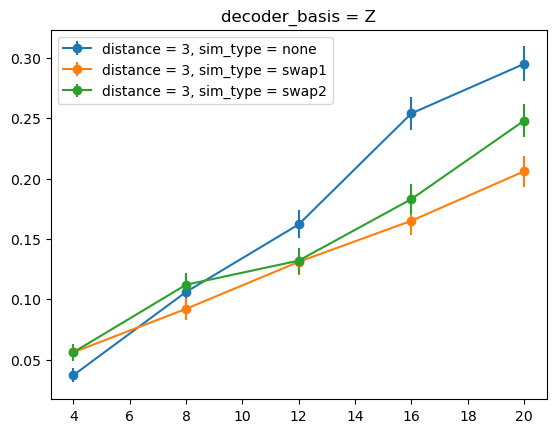

In [2]:
sim_types = ['none', 'swap1', 'swap2']
distances = [3,5]
for distance in distances:
    for sim_type in sim_types:
        if distance in logical_error_rates and sim_type in logical_error_rates[distance]:
            plt.errorbar(x=num_cycles_vec, y=logical_error_rates[distance][sim_type], yerr=logical_error_rates_err[distance][sim_type], fmt='-o', label = f'distance = {distance}, sim_type = {sim_type}')

plt.legend()
plt.title(f"decoder_basis = {decoder_basis}")

## Sanity check: make sure that without loss, SWAP == None

In [1]:
from BiasedErasure.delayed_erasure_decoders.Experimental_Loss_Decoder import *
import numpy as np

decoder_basis = 'Z'

# updated noise channels (October 28, 2024):
if decoder_basis == 'X':
    noise_params = {'idle_loss_rate': 0.0, 'idle_error_rate': np.array([7.06326614e-09, 3.93582261e-08, 3.07716032e-07]), 'entangling_zone_error_rate': np.array([4.48138464e-04, 4.52669093e-06, 3.63626108e-03]), 'entangling_gate_error_rate': [2.172286257921888e-05, 0.00016461310352043143, 0.0006884605952859195, 2.172286257921888e-05, 0, 0, 0, 0.00016461310352043143, 0, 0, 0, 0.0006884605952859195, 0, 0, 0.003258887622865566], 'entangling_gate_loss_rate': 0.0, 'single_qubit_error_rate': np.array([9.40058189e-06, 9.91293229e-04, 2.22504795e-05]), 'reset_error_rate': 0.00012458224756901076, 'measurement_error_rate': 0.0014782898309565174, 'reset_loss_rate': 0.0, 'measurement_loss_rate': 0.0, 'ancilla_idle_loss_rate': 0.0, 'ancilla_idle_error_rate': np.array([1.43420373e-07, 4.13895456e-08, 2.76950147e-06]), 'ancilla_reset_error_rate': 0.01965527357627728, 'ancilla_measurement_error_rate': 0.002617725026490211, 'ancilla_reset_loss_rate': 0.0, 'ancilla_measurement_loss_rate': 0.0,
                    'gate_noise':LogicalCircuit.ancilla_data_differentiated_gate_noise,
                'idle_noise':LogicalCircuit.ancilla_data_differentiated_idle_noise}
    
elif decoder_basis == 'Z':
    noise_params = {'idle_loss_rate': 0.0, 'idle_error_rate': np.array([5.97949469e-09, 1.66009551e-08, 3.16038407e-07]), 'entangling_zone_error_rate': np.array([6.31538566e-05, 4.39908127e-06, 4.11883477e-03]), 'entangling_gate_error_rate': [2.187417072355454e-05, 0.00016310295649120185, 0.0004186396150717414, 2.187417072355454e-05, 0, 0, 0, 0.00016310295649120185, 0, 0, 0, 0.0004186396150717414, 0, 0, 0.0026334609908267317], 'entangling_gate_loss_rate': 0.0, 'single_qubit_error_rate': np.array([1.13311236e-05, 9.87605642e-04, 1.24821481e-05]), 'reset_error_rate': 4.3548543279170854e-05, 'measurement_error_rate': 0.0006043136875670862, 'reset_loss_rate': 0.0, 'measurement_loss_rate': 0.0, 'ancilla_idle_loss_rate': 0.0, 'ancilla_idle_error_rate': np.array([1.53858586e-07, 4.39598845e-08, 1.30653339e-06]), 'ancilla_reset_error_rate': 0.02062656542887287, 'ancilla_measurement_error_rate': 0.003521858902549592, 'ancilla_reset_loss_rate': 0.0, 'ancilla_measurement_loss_rate': 0.0,
                    'gate_noise':LogicalCircuit.ancilla_data_differentiated_gate_noise,
                'idle_noise':LogicalCircuit.ancilla_data_differentiated_idle_noise}


sim_types = ['none', 'swap1', 'swap2']
sim_types = ['swap1']
distances = [3]
num_cycles_vec = [4,8,12,16]

logical_error_rates = {}
logical_error_rates_err = {}

for distance in distances:
    logical_error_rates[distance] = {}
    logical_error_rates_err[distance] = {}
    for sim_type in sim_types:
        logical_error_rates[distance][sim_type] = []
        logical_error_rates_err[distance][sim_type] = []
        
        for num_cycles in num_cycles_vec:
            
            if sim_type == 'swap1':
                gate_ordering = ['Z', 'Zr', 'Z', 'Zr'] * int(num_cycles / 4)
                LD_freq = 1
                LD_method = 'SWAP'
            elif sim_type == 'swap2':
                gate_ordering = ['Z', 'Z', 'Zr', 'Zr'] * int(num_cycles / 4)
                LD_freq = 2
                LD_method = 'SWAP'
            elif sim_type == 'none':
                gate_ordering = ['Z', 'Zr', 'Z', 'Zr'] * int(num_cycles / 4)
                LD_freq = 100
                LD_method = 'None'
                
            print(f"sim_type = {sim_type}, num_cycles = {num_cycles}, gate_ordering = {gate_ordering}")
            num_cycles = len(gate_ordering)


            Meta_params = {
                'architecture': 'CBQC', 'code': 'Rotated_Surface', 'logical_basis': decoder_basis,
                'bias_preserving_gates': 'False', 'noise': 'atom_array', 'is_erasure_biased': 'False',
                'LD_freq': str(LD_freq), 'LD_method': LD_method, 'SSR': 'True', 'cycles': str(num_cycles),
                'ordering': gate_ordering, 'decoder': 'MLE', 'circuit_type': 'memory',
                'Steane_type': 'regular', 'printing': 'False', 'num_logicals': '1',
                'loss_decoder': 'independent', 'obs_pos': 'd-1', 'n_r': '0', 'circuit_index': '0'
            }

            num_shots = 2000
            detection_events_signs = None
            measurement_events, _, _, circuit = get_simulated_measurement_events(Meta_params, distance, distance, num_shots, noise_params)


            # Now let's decode!
            use_loss_decoding = True  # if False: use same DEM every shot, without utilizing SSR.
            use_independent_decoder = True  # if False: in every lifecycle, we just apply supercheck at the end. If True: we count the full lifecycle with different potential loss locations and corresponding Clifford propagations.
            use_independent_and_first_comb_decoder = False  # This is relevant only if use_independent_decoder=True. If False: use only independent lifecycles. If True: adds a single combination of lifecycles to the decoder.
            output_dir = '/Users/gefenbaranes/Documents/memory_experiment_no_loss'
            logical_gap = False
            # circuit = get_lossless_circuit(Meta_params, distance, distance, noise_params)

            # DO IT
            if not logical_gap:
                predictions, observable_flips, dems_list = Loss_MLE_Decoder_Experiment(Meta_params, distance, distance, output_dir,
                                                                                    measurement_events,
                                                                                    detection_events_signs, use_loss_decoding,
                                                                                    use_independent_decoder,
                                                                                    use_independent_and_first_comb_decoder,
                                                                                    logical_gaps=False,
                                                                                    noise_params=noise_params, num_shots=num_shots)
                logical_probability = np.mean(np.logical_xor(observable_flips, predictions))
                
            else:
                predictions, log_probabilities, observable_flips, dems_list = Loss_MLE_Decoder_Experiment(Meta_params, distance, distance, output_dir,
                                                                                    measurement_events,
                                                                                    detection_events_signs, use_loss_decoding,
                                                                                    use_independent_decoder,
                                                                                    use_independent_and_first_comb_decoder,
                                                                                    logical_gaps=True, 
                                                                                    noise_params=noise_params, num_shots=num_shots)

                logical_probability = np.mean(np.logical_xor(observable_flips.flatten(), predictions[:, 0]))

            err_bar =  (np.sqrt(logical_probability*(1-logical_probability)/num_shots))
            
            
            logical_error_rates[distance][sim_type].append(logical_probability)
            logical_error_rates_err[distance][sim_type].append(err_bar)
            print(f'\n logical error = {logical_probability} +- {err_bar}')



sim_type = swap1, num_cycles = 4, gate_ordering = ['Z', 'Zr', 'Z', 'Zr']
round_ix = 0, SWAP_round = True
round_ix = 1, SWAP_round = True
round_ix = 2, SWAP_round = True
round_ix = 3, SWAP_round = True
round_ix = 0, SWAP_round = True
round_ix = 1, SWAP_round = True
round_ix = 2, SWAP_round = True
round_ix = 3, SWAP_round = True


ValueError: The circuit contains non-deterministic observables.
(Error analysis requires deterministic observables.)
The circuit contains non-deterministic detectors.
(To allow non-deterministic detectors, use the `allow_gauge_detectors` option.)

This was discovered while analyzing a Z-basis reset (R) on:
    qubit 16

The collapse anti-commuted with these detectors/observables:
    D30
    D31
    L0

The backward-propagating error sensitivity for D30 was:
    X0
    Z3
    Z4
    X5
    Z6
    X7
    Y8
    X9
    Z10
    Y13
    Z14
    X15
    X16

The backward-propagating error sensitivity for D31 was:
    X3
    Y6
    X9
    X13
    Z14
    X15
    Y16

The backward-propagating error sensitivity for L0 was:
    X4
    X5
    Z6
    X10
    Z14
    X15
    X16

Circuit stack trace:
    during TICK layer #8 of 9
    at instruction #146 [which is R 4 12 2 6 1 5 3 16]

ValueError: 'x' and 'y' must have the same size

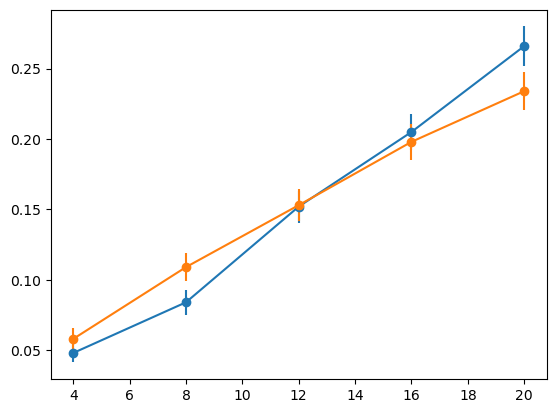

In [2]:
sim_types = ['none', 'swap1', 'swap2']
distances = [3,5]
for distance in distances:
    for sim_type in sim_types:
        if distance in logical_error_rates and sim_type in logical_error_rates[distance]:
            plt.errorbar(x=num_cycles_vec, y=logical_error_rates[distance][sim_type], yerr=logical_error_rates_err[distance][sim_type], fmt='-o', label = f'distance = {distance}, sim_type = {sim_type}')

plt.legend()
plt.title(f"decoder_basis = {decoder_basis}")

In [ ]:
SIMULATE AGAIN WITH UPDATED ERROR MODEL